<a href="https://colab.research.google.com/github/nicolez9911/colab/blob/main/AdvML_L2S2_N2_Application_Perceptron_hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06_EX_01 Application of a Perceptron - Hyperparameters

This exercise notebook focuses on making use of our Perceptron implementation to explore the effects and
optimization strategies for hyperparameters.

Estimated time for Exercise 1-3 45 - 60 min.

## 1. Perceptron class

We will re-use the Perceptron calass from `04_EX_01`.

The class is capable of doing binary classification and provides of the following methods:

* fit: train the Perceptron
* net_input: calculate the net_input
* predict: make a prediction based on a sample input

Note: A single perceptron class is only capable of binary classification. In our case we have hardwired the classes as
      `-1` and `1`. If you want to make use of the Perceptron class for a new dataset you have to map the target value
      to these two classes.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import os

class Perceptron(object):

    """Perceptron binary classifier.

    Parameters
    -----------
    eta : float
       Learning rate (value between 0.0 and 1.0)
    epochs  : int
       Number of passes over the training set

    Attributes
    -----------
    w_  : 1d-array
       Weights after fitting.
    errors_   : list
       Number of updates (triggered by prediction != target)

    """

    def __init__(self, eta=0.01, epochs=10, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data; i.e. train the Perceptron

        Parameters
        -----------
        X : dataframe with shape - [n_samples, n_features]
          feature vectors, where n_samples is the number of samples
          in the data set, n_features is the number of features
        y : dataframe with shape = [n_samples].
            1 target value per sample (the label).

        Returns
        -----------
        self : object

        """

        # this initialize the weights
        rgen = numpy.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        # this will be used to store the number of updates per epoch
        self.errors_ = []
        self.training_accuracy_ = []
        self.test_accuracy_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.training_accuracy_.append(get_training_accuracy())
            self.test_accuracy_.append(get_test_accuracy())
        return self

    def net_input(self, x):
        """Calculate net input"""
        net_input = sum(t[0] * t[1] for t in zip(x, self.w_[1:])) + self.w_[0]
        return net_input

    def predict(self, x):
        """Predict based on computing the net input and the threshold function"""
        net_input = self.net_input(x)
        if net_input >= 0.0:
            prediction = 1
        elif net_input < 0.0:
            prediction = -1
        return prediction


Modules imported.


### MNIST Dataset

In order to start testing our Perceptron implementation we will move to a different and more realistially sized MNIST dataset.

We have already used the MNNIST dataset in the last semester when we started to familiarize us with the Machine Learning workflow.

"MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image." (source: http://yann.lecun.com/exdb/mnist/)

To save you some time the following cell does the following:
1. download the dataset
2. sort the dataset by target
3. create a binary test set
4. split off the test data.

In [ ]:
from sklearn.utils import shuffle

# Download and sort the dataset

# Sorts the dataset by target (i.e the numbers 0-9). Sorts only the first 60000 entries (the training set).
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]


# Download and sort the dataset
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]


print(f"The shape of the target dataset is {mnist.target.shape}")
print(f"The shape of the sample dataset is {mnist.data.shape}")




# Select 5000 values for 0 and 9 each by manually checking the boundaries or by checking for target value.
mnist_0_target = mnist.target[0:5000]
mnist_0_data = mnist.data[0:5000]
mnist_9_target = mnist.target[55000:60000]
mnist_9_data = mnist.data[55000:60000]
mnist_bin_0_9_data = np.concatenate((mnist_0_data, mnist_9_data))
mnist_bin_0_9_target = np.concatenate((mnist_0_target, mnist_9_target))
mnist_bin_0_9_target = np.where(mnist_bin_0_9_target == 0, -1, 1)

X, y = shuffle(mnist_bin_0_9_data, mnist_bin_0_9_target)
X = mnist_bin_0_9_data
y = mnist_bin_0_9_target
print(f"The input X contains {len(X)} samples.")
print(f"The target vector y contains {len(y)} samples.")

# Create test set
y_temp_0 = mnist.target[60001:60979]
y_temp_9 = mnist.target[68991:69999]

X_temp_0 = mnist.data[60001:60979]
X_temp_9 = mnist.data[68991:69999]
#ind_0 = np.argwhere(y_temp.astype(int) == 0)
#ind_9 = np.argwhere(y_temp.astype(int) == 9)

#y_test = np.concatenate((y_temp[ind_0], y_temp[ind_9]))
#X_test = np.concatenate((X_temp[ind_0], X_temp[ind_9]))
y_test = np.concatenate((y_temp_0, y_temp_9))
y_test = np.where(y_test == 0, -1, 1)
X_test = np.concatenate((X_temp_0, X_temp_9))



## Scoring Functions

The following cell defines two convenient functions to:


* Evaluate the precision on the `training set` (entries 0-60k).
* Evaluate the precision on `the test` (entries 60001 - 70k) set (only those entries for `0` and `9` targets.


In [ ]:
from sklearn.metrics import accuracy_score

def get_training_accuracy():
    y_pred = []
    y_true = []

    for i in range(0,10000):
        y_pred.append(ppn.predict(X[i]))
        y_true.append(y[i])

    training_data_score = accuracy_score(y_true, y_pred)
    return training_data_score

The shape of the target dataset is (70000,)
The shape of the sample dataset is (70000, 784)


In [ ]:
def get_test_accuracy():

    y_pred = []
    y_true = []

    for i in range(0, len(y_test)):
        y_pred.append(ppn.predict(X_test[i]))
        y_true.append(y_test[i])

    test_data_score = accuracy_score(y_true, y_pred)
    return test_data_score


## Exercise 1: $\eta$ or no $\eta$. The effect of learning rate


As a first exercise let's be a little bit radical and test what happens if we remove the $\eta$ learning rate parameter.
(by commenting it out in the Perceptron implementation in this notebook).

1. Set a breakpoint during training, or alternatively print or record the outputs when training with $\eta$.
2. Remove the hyperparameter from the implementation and repeat the training process looking at the updates.
3. Do full trainings and compare the evolution of the number of updates per training for different training set sizes
   for a Perceptron with $\eta$ and without $\eta$ `smoothing`. You should be able to see and observe what is the role
   of $\eta$
4. In the implementation without \$eta$ try to add a sample at the end of the training set that is adversarial to the
   training process (think of noise, or an erroneous sample, a 0 that looks a lot like a 9, a 0 that misses some data).
   This might be easiest if you introduce a mis-labelling at the end (i.e. change the last label
   from -1 to 1 or vice versa).
   What observations can you make in the version without $\eta$?


## Train Perceptron

The cell below can be used for exercise 1.



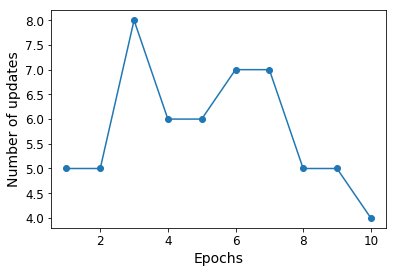

In [ ]:
hyper_param_eta = 0.1
ppn = Perceptron(eta=hyper_param_eta, epochs=1)
ppn.fit(X,y)



## Hyperparameter Optimization

Now that we have the implementation of the Perceptron and the evaluation based on MNIST in place, we can start to
explore the relation between:

* Hyperparameter $\eta$
* number of epochs
* accuracy score

### Exploring the Effect of the Learning Rate $\eta$

In earlier lectures we already hinted at the possible effects of setting a too large or too small value for $\eta$.
* If $\eta$ is too large we will not be able to converge on the optimum or to converge at all in some cases. The changes
  we make to the weight vector will be too extreme and won't allow us to find the optimal weights.
* If we set a very small value for $\eta$ then this will lead to a very small adjustment of the weights, and potentially
  prolong the duration of the training.
  
It is important to develop an understanding of the effect of the learning rate, and by time develop an intuition that
will allow us to make an educated guess if it is advised to lower or increase "\eta".

### Exercise 2: Range Bounds for $\eta$

This exercise aims at observing the adverse effects induced by too large or too small values for $\eta$.
Using the tooling provided by the score evaluation and the plotting of updates, try to identify lower and upper bounds
for $\eta$ where things start to go south.

1. Identify a upper bound for $\eta$ that lets you observe a degradation in accuracy
2. Identify a lower bound for $\eta$ where the accuracy stays approximately constant, but training time required to
   reach that accuracy increases.
   
In order to idenfity these bounds it might be necessary to adjust the notebook a bit. It might be helpful to
plot accuracy alongside the errors and updates observed during epochs.


Hint: For this experimental analysis it is often a good approach to work with `order of magnitude` changes (always
change by a factor of ten), followed by `divide and conquer` strategies.



## Train Perceptron

The cell below can be used for exercise 2.

It supplies you with a triple plot output that plots
* number of updates over epochs
* training set accuracy over epochs
* test set accuracy over epochs

All you need to do is to set a different eta at the top of the cell.
Use this to approach exercise 2.



In [ ]:
# change eta in the line below for exercise 2
hyper_param_eta = 0.1

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.set_size_inches(14.5, 8.5, forward=True)
def plot_metrics(num_epochs):

    x_values = np.array(np.array(range(1, num_epochs +1)))
    # Plot number of epochs versus number of updates (i.e. errors, false classifications).
    ax1.plot(x_values, np.array(ppn.errors_), marker='o')
    ax1.set(xlabel='Epochs', ylabel='Number of updates')

    # Plot accuracy on training set
    ax2.plot(x_values, np.array(ppn.training_accuracy_), marker='o')
    ax2.set(xlabel='Epochs', ylabel='Training Accuracy')

    # Plot accuracy on test set
    ax3.plot(x_values, np.array(ppn.test_accuracy_), marker='o')
    ax3.set(xlabel='Epochs', ylabel='Test Accuracy')

ppn = Perceptron(eta=hyper_param_eta, epochs=10)
ppn.fit(X,y)
plot_metrics(ppn.epochs)
fig.tight_layout()
fig.show()


## Exercise 3: Finding an Optimal Value for $\eta$

Hyperparameter optimization aims at finding an optimal value for $\eta$.
Our current implementation of the Perceptron has two hyperparameters:

* $\eta$
* Number of epochs

Use the cell below to implement a strategy to identify an optimal hyperparameter combination.

Re-use the already implemented methods for measuring training and test-set accuracy.

Hint: In order to find the best value you have to explore the hyperparameter space
create by the two hyperparameters.